In [1]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)

import matplotlib
import matplotlib.pyplot as plt
font = {'size' : 20}
matplotlib.rc('font', **font)

import seaborn as sns

from pylab import rcParams
rcParams["figure.figsize"] = 30,16

import sklearn
from sklearn import metrics

import numpy as np
import scipy

import datetime as dt
from datetime import date

from collections import OrderedDict

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.insert(0, "../")
import functions

# <font size="7">Vergleich der Luftfeuchtigkeit</font>

In [2]:
#Daten aus jeweiliger CSV-Datei laden
df = pd.read_csv("Datenbeschaffung/kalender.csv", index_col=0, parse_dates=True, usecols=[0,2])
df = df.join(pd.read_csv("Datenbeschaffung/stuttgart.csv", index_col=0, parse_dates=True, usecols=[0,1], squeeze=True).rename("stuttgart"))
df = df.join(pd.read_csv("Datenbeschaffung/freiburg.csv", index_col=0, parse_dates=True, usecols=[0,1], squeeze=True).rename("freiburg"))
df = df.join(pd.read_csv("Datenbeschaffung/mannheim.csv", index_col=0, parse_dates=True, usecols=[0,1], squeeze=True).rename("mannheim"))
df = df.join(pd.read_csv("Datenbeschaffung/ulm.csv", index_col=0, parse_dates=True, usecols=[0,1], squeeze=True).rename("ulm"))

#Durchschnitt berechnen
df["durchschnitt"] = round(((df["stuttgart"] + df["freiburg"] + df["mannheim"] + df["ulm"]) / 4), 1)

print(df)

             wochentag  stuttgart  freiburg  mannheim   ulm  durchschnitt
datum                                                                    
2015-01-01  Donnerstag       96.0      94.0      97.0  97.0          96.0
2015-01-02     Freitag       90.0      92.0      93.0  92.0          91.8
2015-01-03     Samstag       96.0      98.0      98.0  97.0          97.2
2015-01-04     Sonntag       96.0      94.0      92.0  97.0          94.8
2015-01-05      Montag       86.0      85.0      90.0  90.0          87.8
...                ...        ...       ...       ...   ...           ...
2021-12-27      Montag       88.0      88.0      93.0  91.0          90.0
2021-12-28    Dienstag       83.0      87.0      87.0  88.0          86.2
2021-12-29    Mittwoch       86.0      93.0      85.0  87.0          87.8
2021-12-30  Donnerstag       87.0      95.0      87.0  90.0          89.8
2021-12-31     Freitag       86.0      87.0      83.0  89.0          86.2

[2557 rows x 6 columns]


<font size="5">Beim Merkmal handelt es sich um die relative Luftfeuchtigkeit. Sie gibt an, wie viel des maximal in der Luft aufnehmbaren Wasser enthalten ist. Die Luftfeuchtigkeit verhält sich in allen Städten relativ ähnlich. Wie der Blick auf die einzelnen Jahre zeigt, befinden sich die Luftfeuchtigkeit überall auf einem gleichen Niveau und die Bewegungen laufen parallel. Lediglich die Stadt Mannheim scheint sich auf einem leicht niedrigeren Level zu befinden als die übrigen Städte. </font>

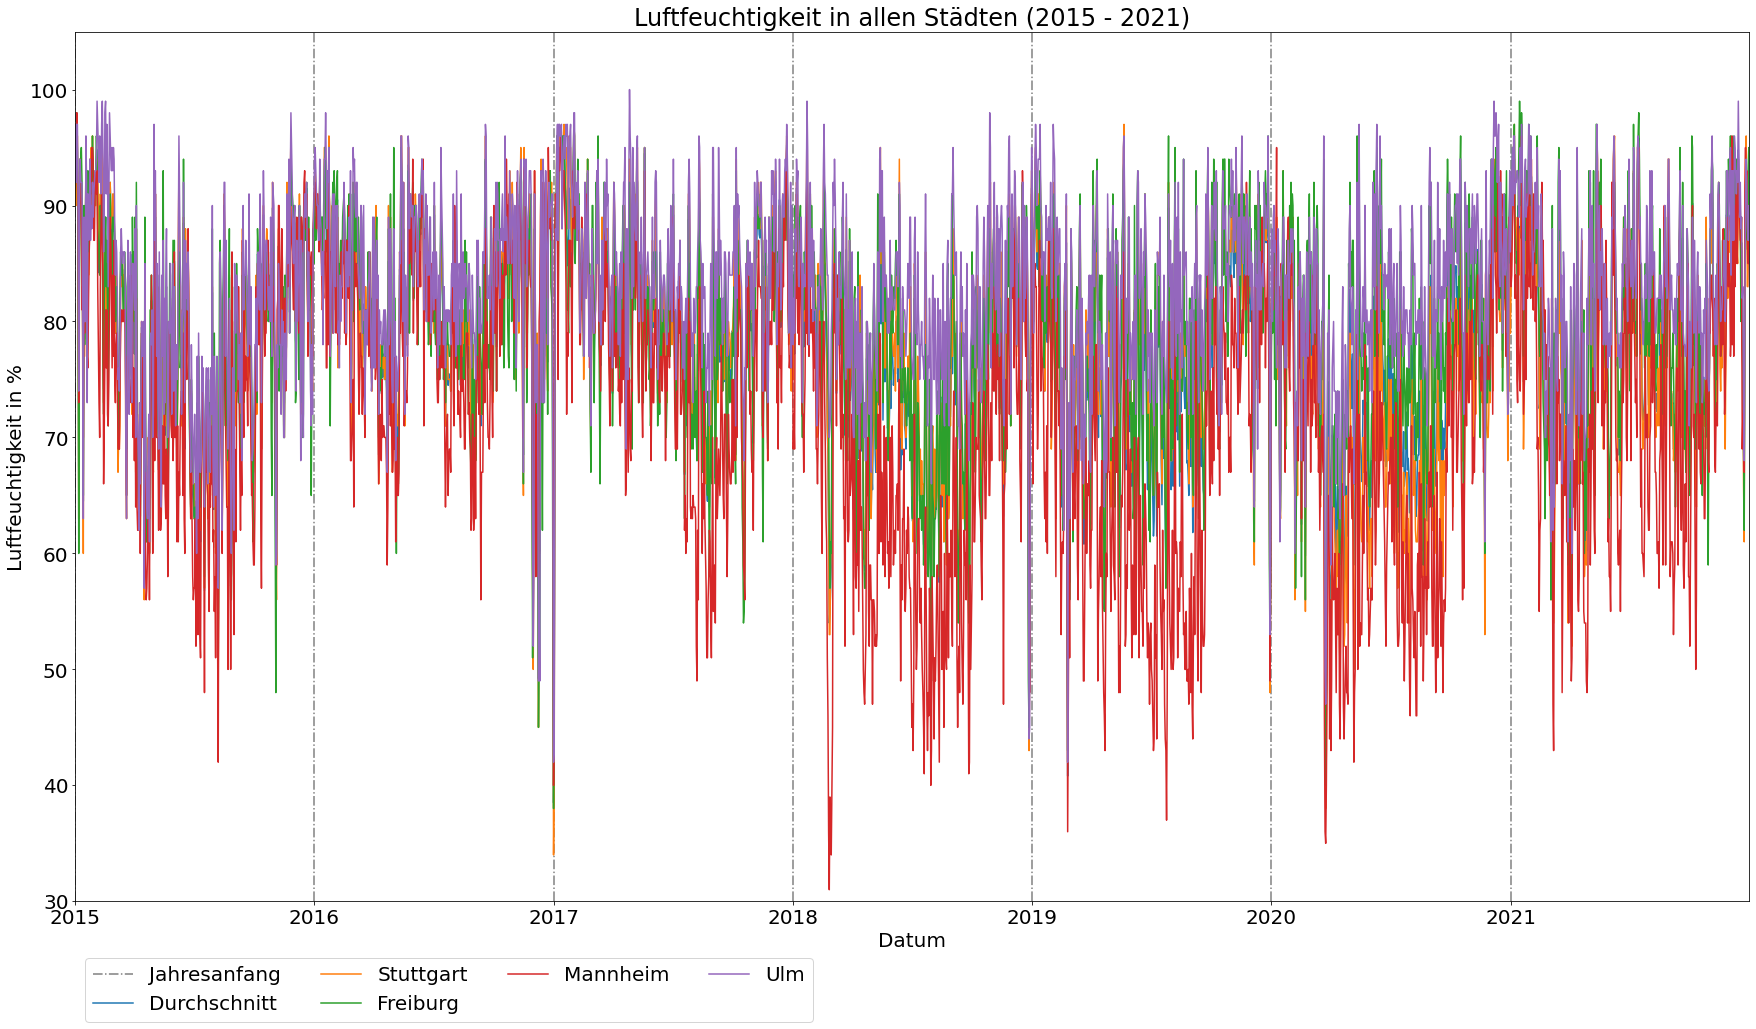



               count       mean        std   min   25%   50%   75%    max
stuttgart     2557.0  78.145483   9.515161  34.0  72.0  79.0  85.0   98.0
freiburg      2557.0  79.434885   9.122930  38.0  74.0  80.0  86.0   99.0
mannheim      2557.0  71.917090  12.051637  31.0  63.0  73.0  81.0   98.0
ulm           2557.0  82.686351   7.809610  42.0  78.0  83.0  88.0  100.0
durchschnitt  2557.0  78.045483   8.767727  38.5  72.2  78.8  84.8   97.2




In [11]:
#Jahre einzeichnen
functions.draw_years(df)

#Daten für jede Stadt und Durchschnitt plotten
plt.plot(df["durchschnitt"], label="Durchschnitt")
plt.plot(df["stuttgart"], label="Stuttgart");
plt.plot(df["freiburg"], label="Freiburg");
plt.plot(df["mannheim"], label="Mannheim");
plt.plot(df["ulm"], label="Ulm");

#Achsen und Layout
plt.title("Luftfeuchtigkeit in allen Städten (2015 - 2021)")
plt.ylabel("Luftfeuchtigkeit in %")
plt.ylim(30, 105)
plt.xlabel("Datum")
plt.xlim(dt.datetime(2015,1,1), dt.datetime(2021,12,31))

#Legende einfügen
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="lower left", bbox_to_anchor=(0,-0.15), ncol=4)

plt.show()

#Deskriptive Statistiken
print("\n")
print(df.describe().transpose())
print("\n")



 2015 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




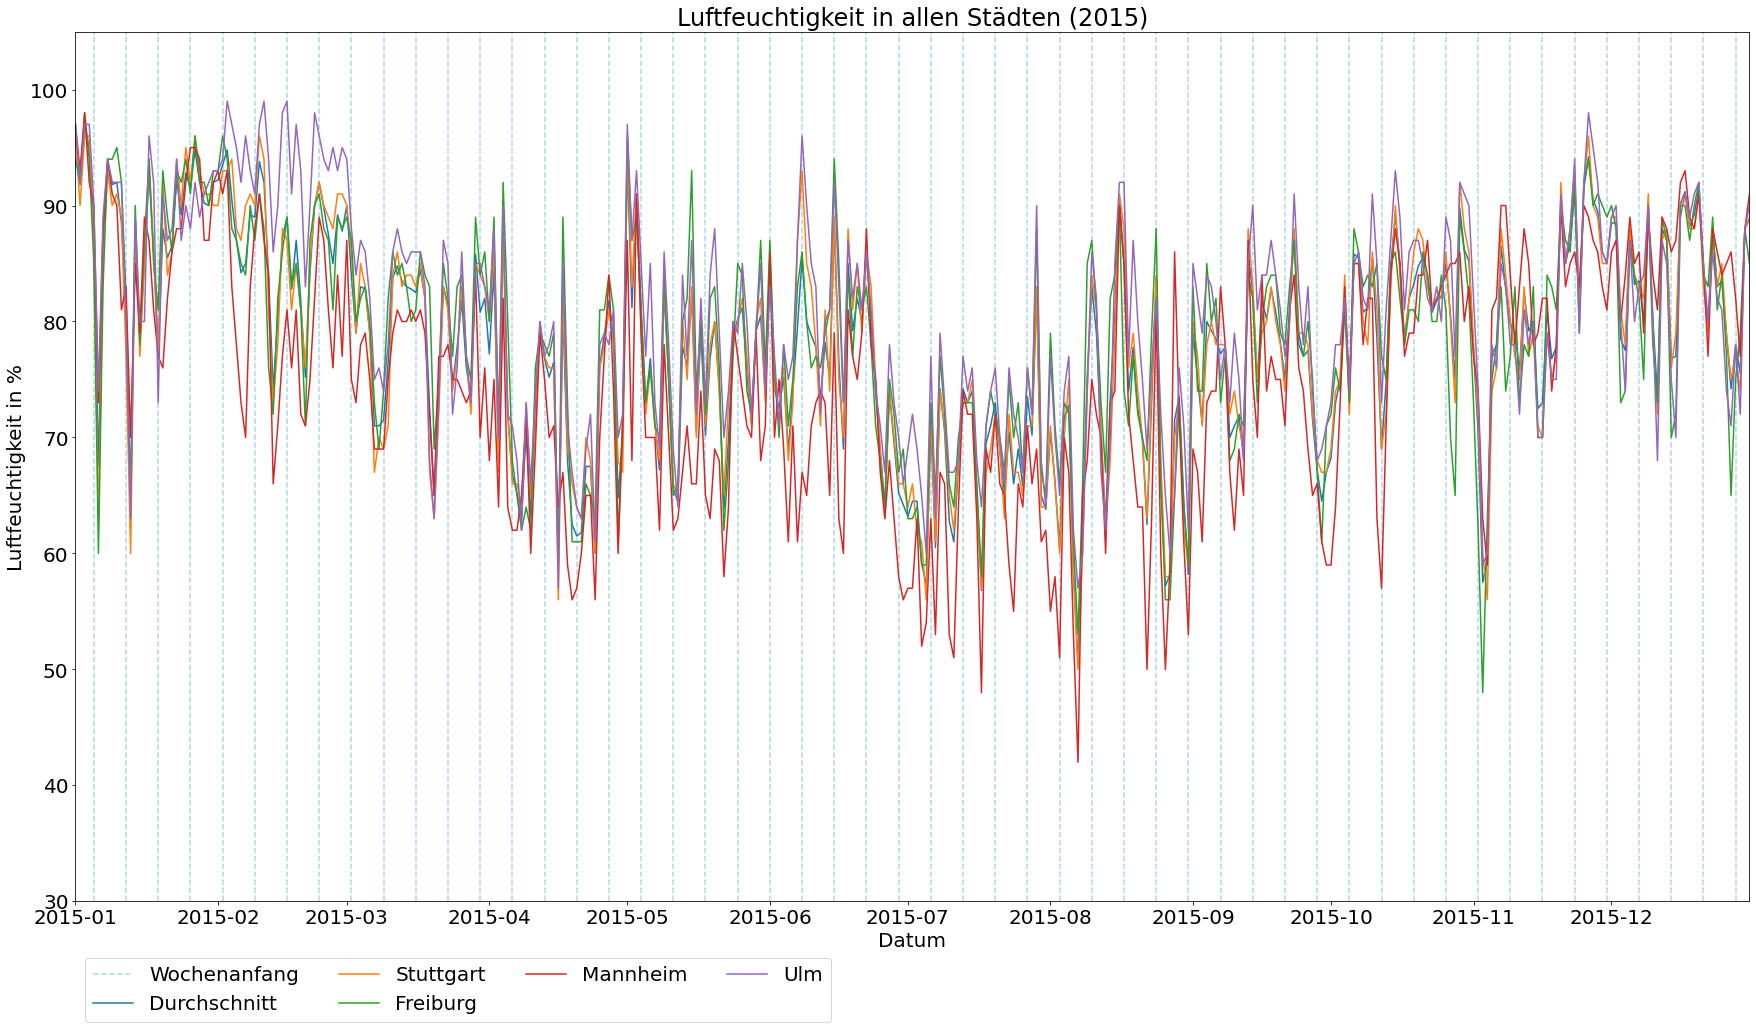



              count       mean        std   min   25%   50%   75%   max
stuttgart     365.0  78.246575   9.444722  50.0  71.0  79.0  85.0  96.0
freiburg      365.0  78.679452   9.310206  48.0  72.0  80.0  86.0  98.0
mannheim      365.0  74.920548  10.692595  42.0  67.0  75.0  84.0  98.0
ulm           365.0  80.487671   9.407618  57.0  73.0  81.0  87.0  99.0
durchschnitt  365.0  78.083836   9.098091  50.5  71.8  79.0  85.0  97.2




 2016 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




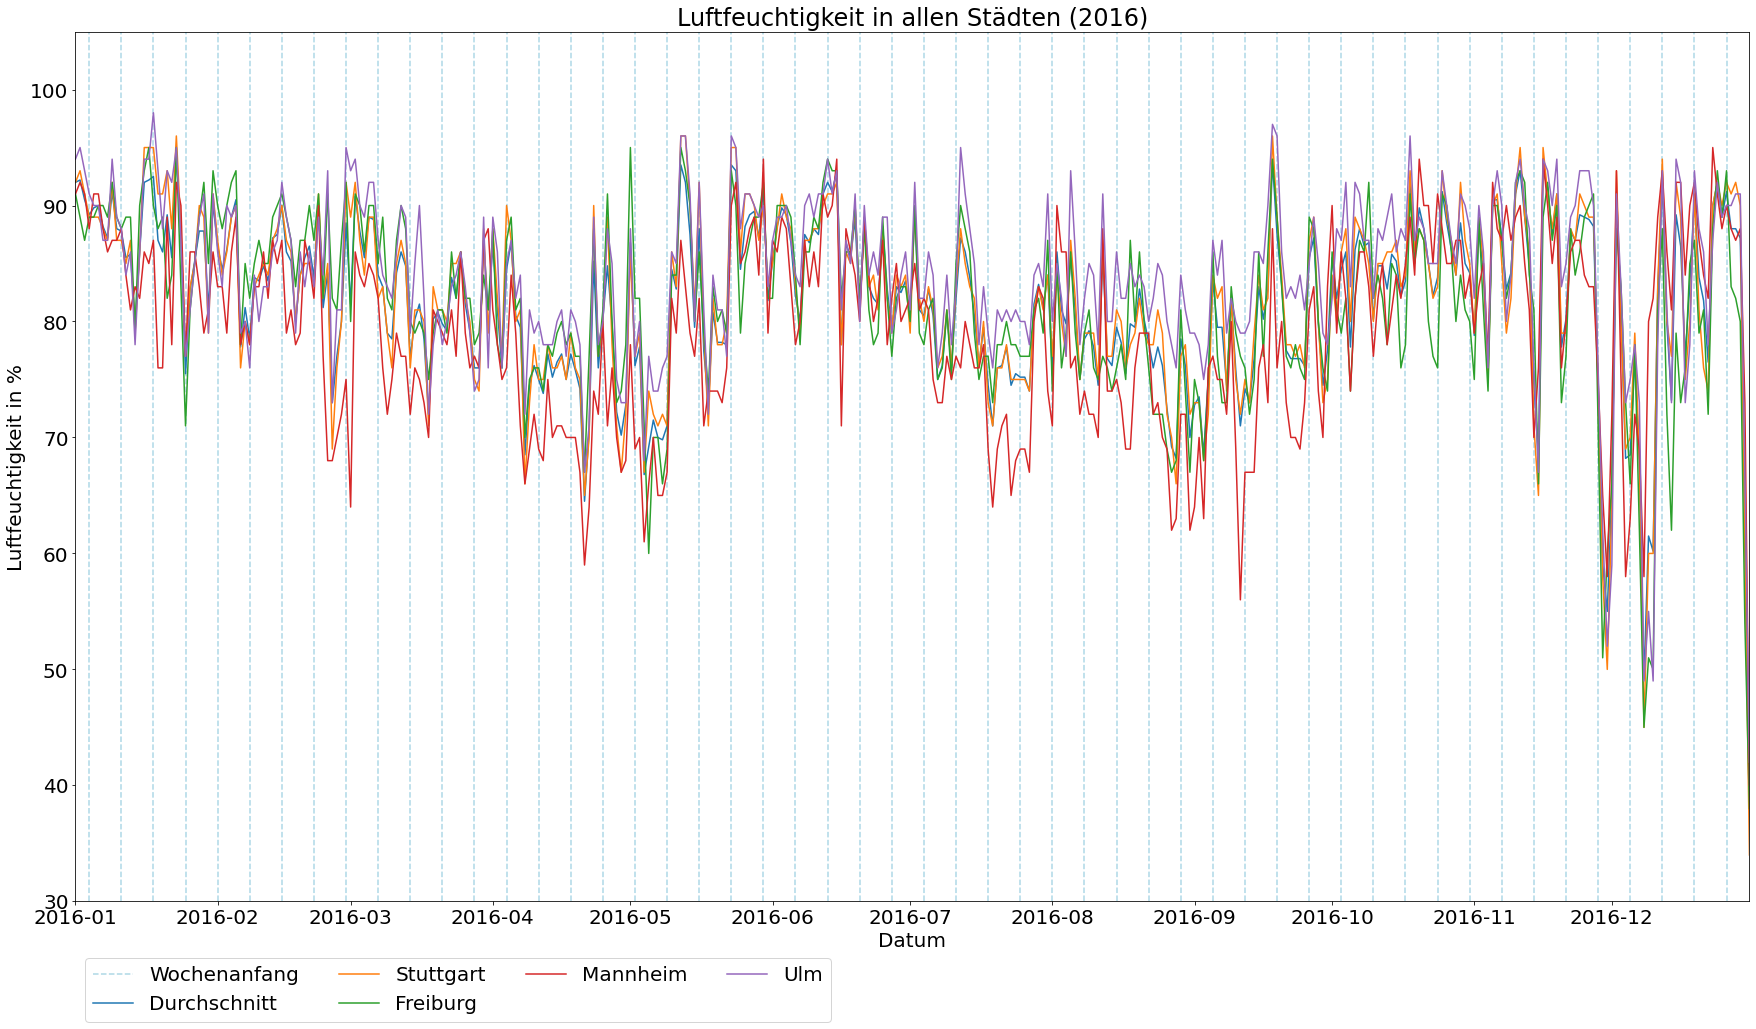



              count       mean       std   min    25%   50%    75%   max
stuttgart     366.0  82.027322  7.964257  34.0  78.00  83.0  88.00  96.0
freiburg      366.0  81.620219  8.131490  38.0  77.00  82.0  88.00  95.0
mannheim      366.0  79.101093  8.272294  40.0  73.00  80.0  86.00  95.0
ulm           366.0  84.062842  7.507358  42.0  80.00  85.0  89.75  98.0
durchschnitt  366.0  81.701093  7.311290  38.5  77.05  82.8  87.20  94.5




 2017 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




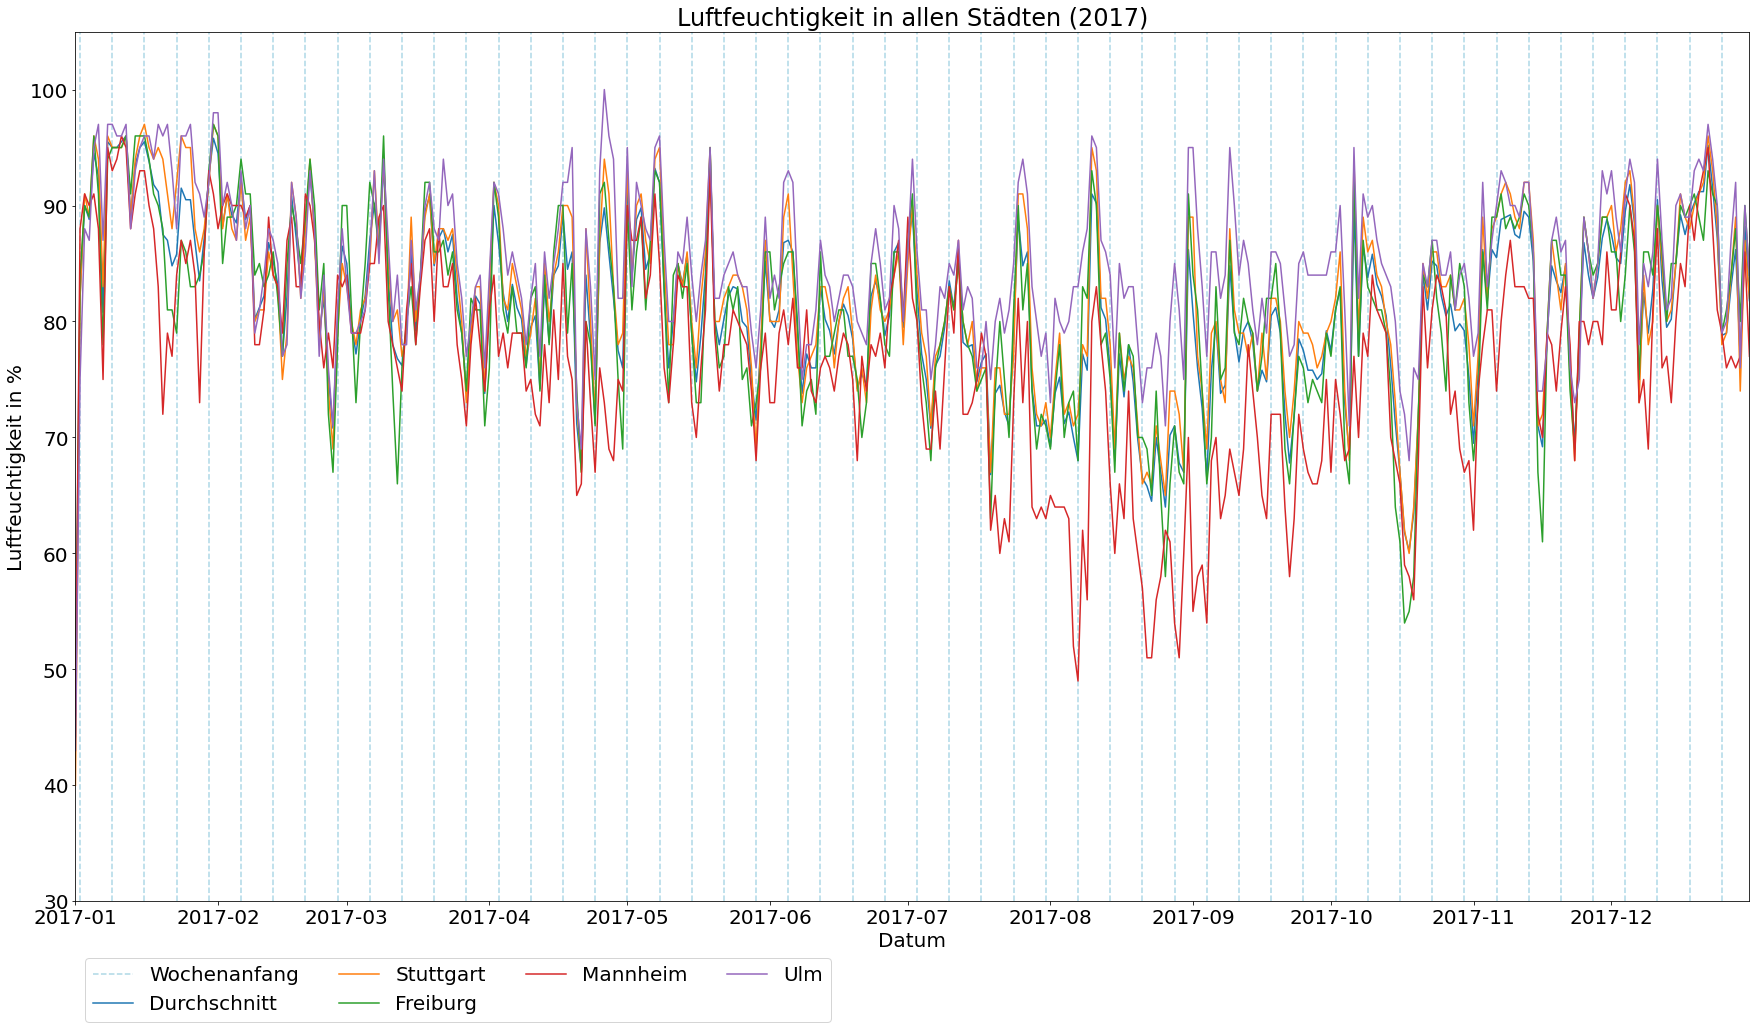



              count       mean       std   min   25%   50%   75%    max
stuttgart     365.0  82.205479  7.711414  40.0  78.0  82.0  88.0   97.0
freiburg      365.0  81.032877  8.134110  48.0  76.0  82.0  86.0   97.0
mannheim      365.0  76.646575  9.477766  46.0  72.0  78.0  83.0   96.0
ulm           365.0  85.093151  6.623475  43.0  81.0  85.0  90.0  100.0
durchschnitt  365.0  81.243562  7.357215  44.2  76.5  81.2  86.8   96.0




 2018 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




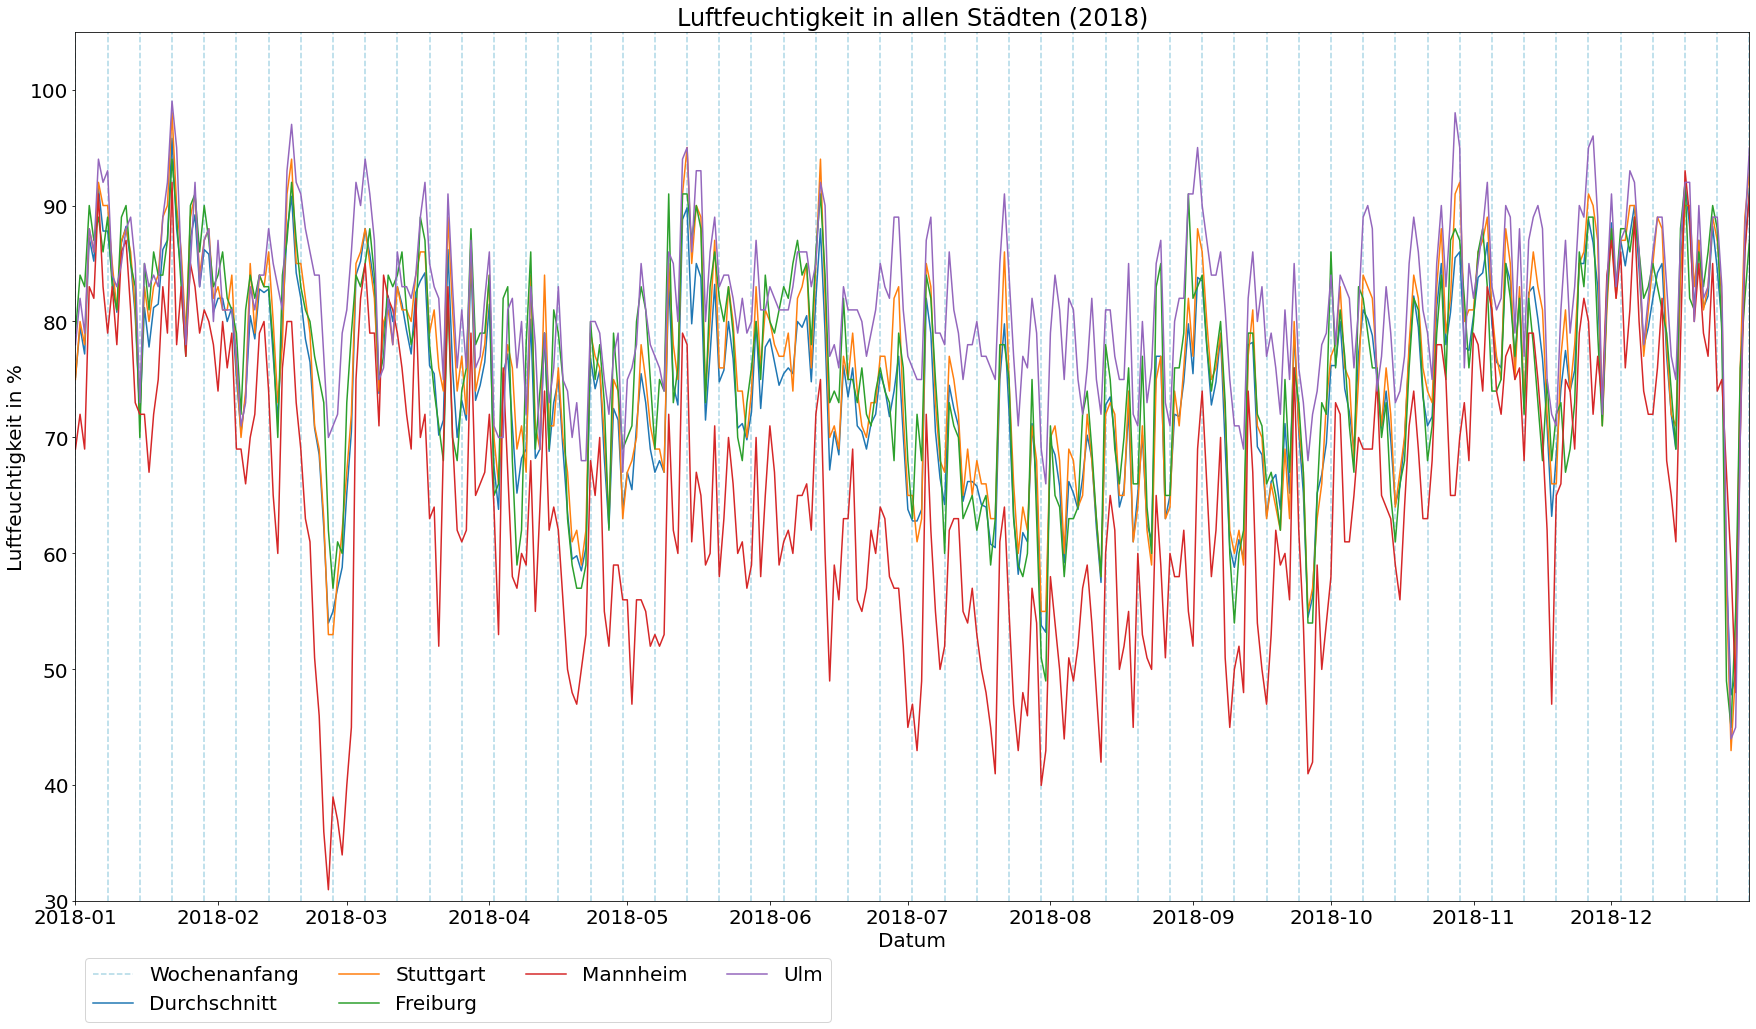



              count       mean        std   min   25%   50%   75%   max
stuttgart     365.0  76.186301   9.227487  43.0  70.0  77.0  83.0  98.0
freiburg      365.0  76.128767   9.271389  45.0  70.0  77.0  83.0  94.0
mannheim      365.0  64.956164  12.107497  31.0  56.0  65.0  74.0  93.0
ulm           365.0  81.550685   7.116826  44.0  77.0  82.0  86.0  99.0
durchschnitt  365.0  74.703288   8.652681  47.8  69.0  75.5  81.2  95.8




 2019 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




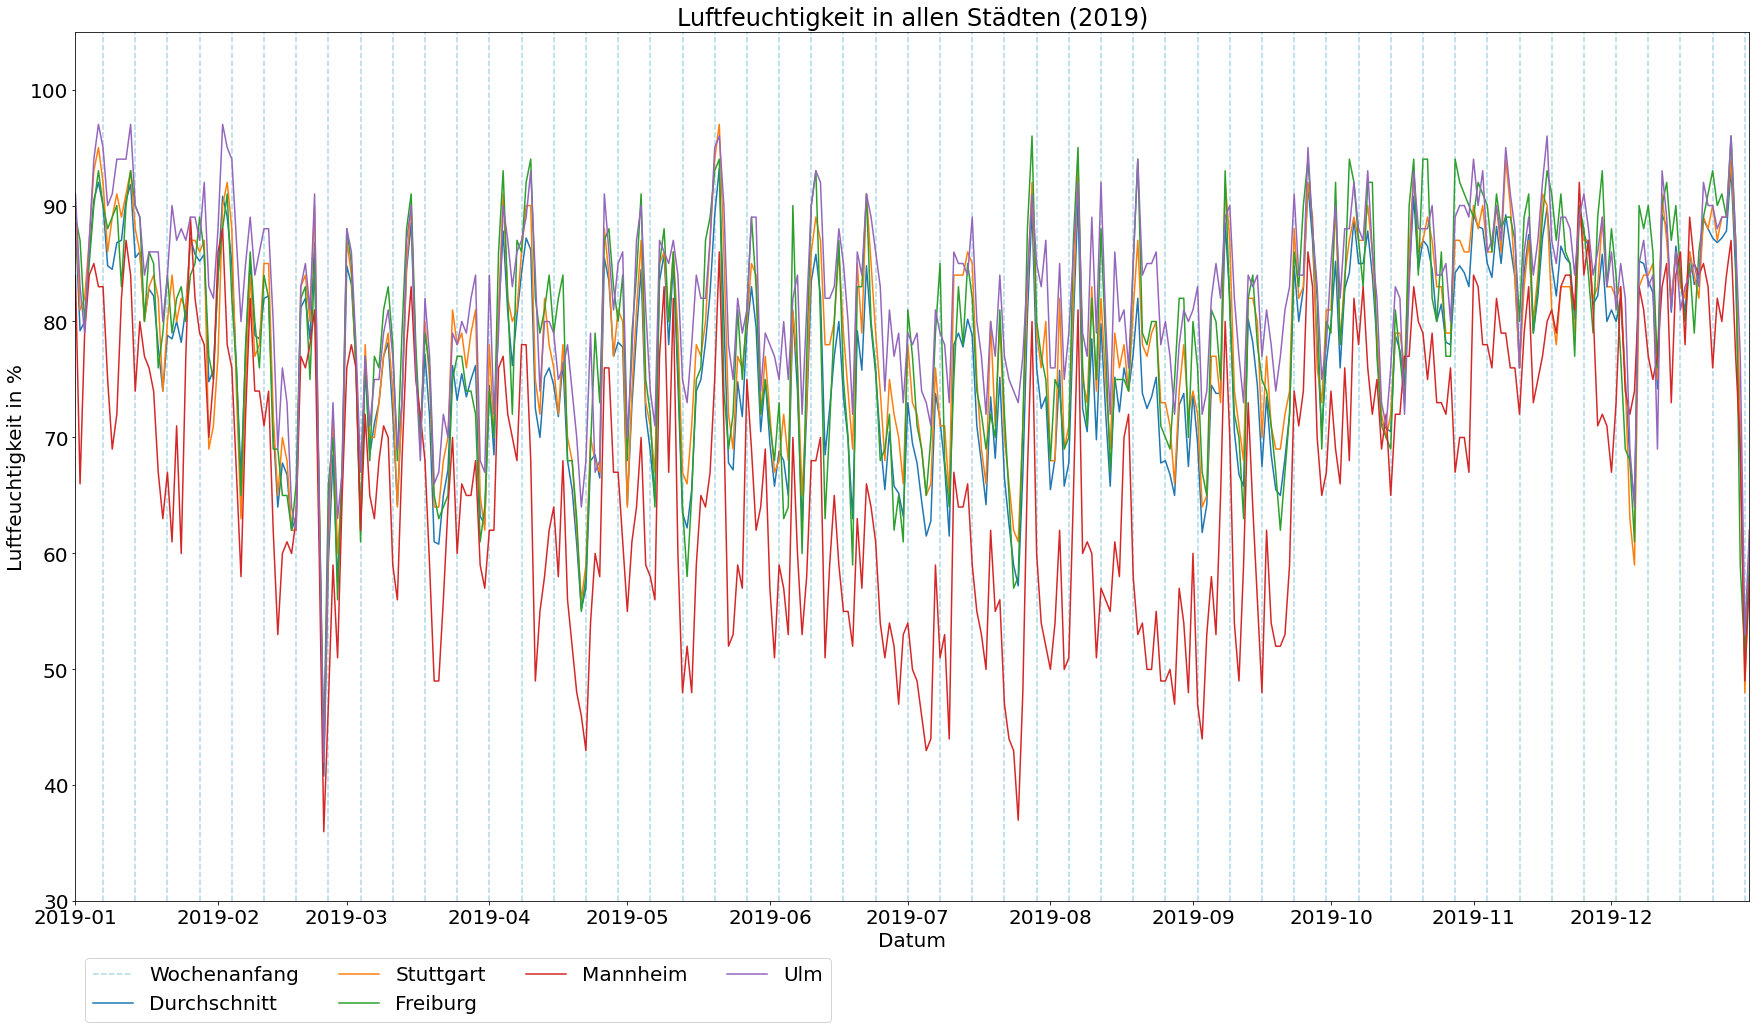



              count       mean        std   min   25%   50%   75%   max
stuttgart     365.0  78.506849   8.714525  42.0  72.0  79.0  86.0  97.0
freiburg      365.0  78.884932   9.706003  43.0  72.0  80.0  87.0  96.0
mannheim      365.0  66.482192  11.867531  36.0  57.0  67.0  76.0  92.0
ulm           365.0  82.153425   7.775597  42.0  77.0  83.0  88.0  97.0
durchschnitt  365.0  76.507397   8.722878  40.8  69.8  77.2  84.0  93.2




 2020 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




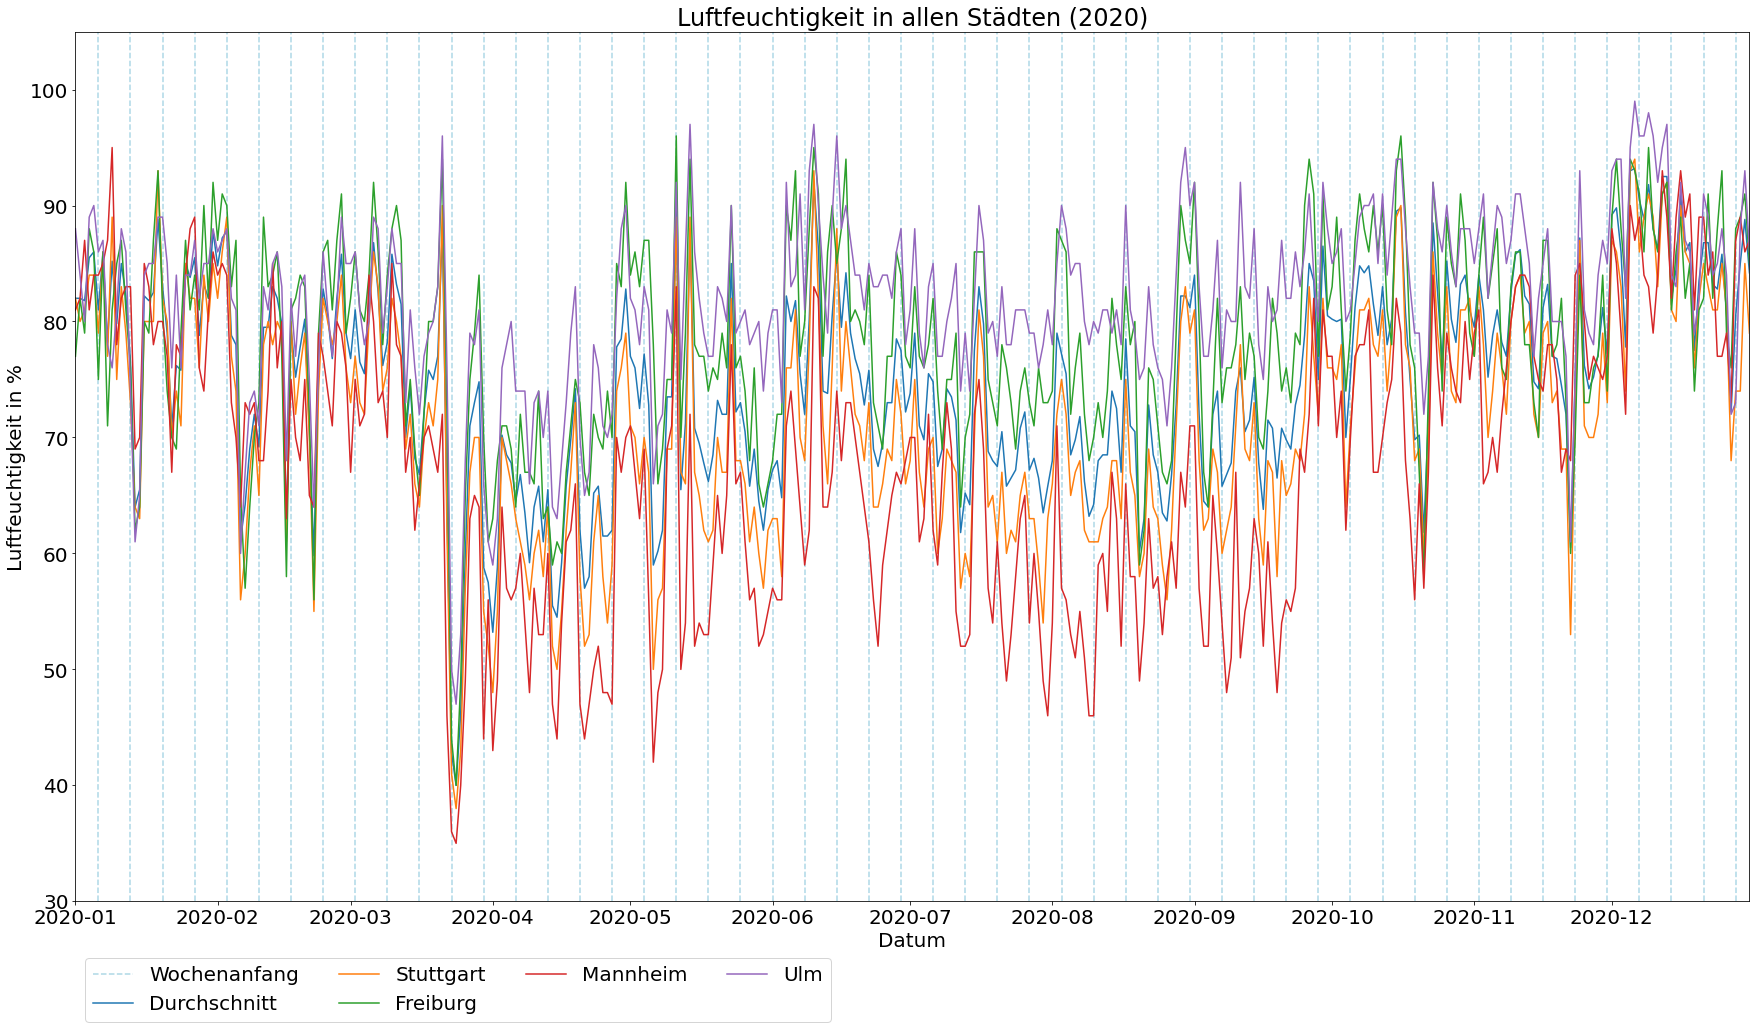



              count       mean        std   min    25%    50%    75%   max
stuttgart     366.0  71.639344   9.853501  38.0  64.25  71.00  80.00  94.0
freiburg      366.0  78.543716   9.059741  40.0  73.00  79.00  86.00  96.0
mannheim      366.0  67.743169  12.262411  35.0  57.00  68.00  77.00  95.0
ulm           366.0  81.792350   7.720142  47.0  78.00  82.00  87.00  99.0
durchschnitt  366.0  74.931148   8.837998  40.0  68.50  75.35  81.95  93.2




 2021 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




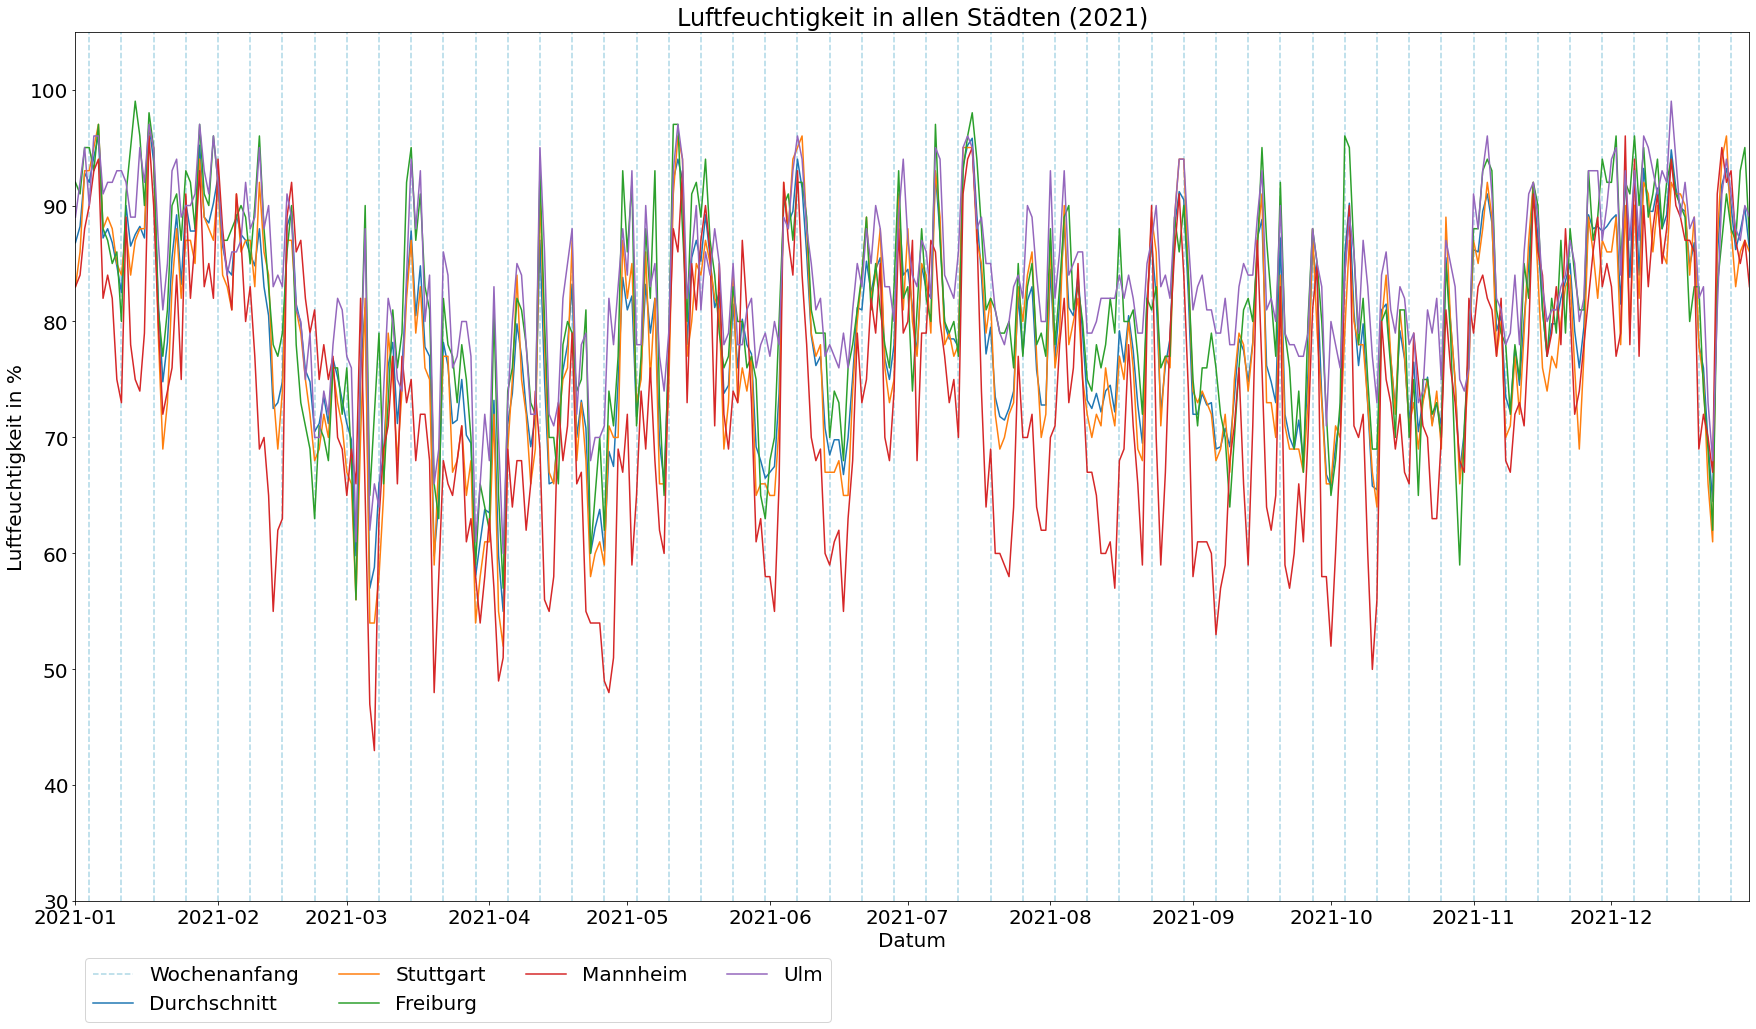



              count       mean        std   min   25%   50%   75%   max
stuttgart     365.0  78.213699   9.316671  52.0  71.0  78.0  86.0  97.0
freiburg      365.0  81.150685   8.936392  56.0  76.0  81.0  88.0  99.0
mannheim      365.0  73.561644  11.273554  43.0  66.0  73.0  83.0  96.0
ulm           365.0  83.663014   7.253182  60.0  79.0  84.0  89.0  99.0
durchschnitt  365.0  79.146575   8.472147  55.0  72.8  79.0  86.2  97.0




In [12]:
for year in [2015, 2016, 2017, 2018, 2019, 2020, 2021]:
    
    print("\n\n", str(year), "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")
    
    #Untere und obere Grenze zum Filtern des DataFrames nach jeweiligem Jahr
    lower_border = str(year) + "-01-01"
    upper_border = str(year) + "-12-31"
    
    #Wochen einzeichnen
    functions.draw_weeks(df[lower_border:upper_border])
    
    #Daten für jede Stadt und Durchschnitt plotten
    plt.plot(df[lower_border:upper_border]["durchschnitt"], label="Durchschnitt")
    plt.plot(df[lower_border:upper_border]["stuttgart"], label="Stuttgart");
    plt.plot(df[lower_border:upper_border]["freiburg"], label="Freiburg");
    plt.plot(df[lower_border:upper_border]["mannheim"], label="Mannheim");
    plt.plot(df[lower_border:upper_border]["ulm"], label="Ulm");
    
    #Achsen und Layout
    plt.title("Luftfeuchtigkeit in allen Städten (" + str(year) + ")")
    plt.ylabel("Luftfeuchtigkeit in %")
    plt.ylim(30, 105)
    plt.xlabel("Datum")
    plt.xlim(dt.datetime(year,1,1), dt.datetime(year,12,31))
    
    #Legende einfügen
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc="lower left", bbox_to_anchor=(0,-0.15), ncol=4)

    plt.show()
    
    #Deskriptive Statistiken
    print("\n")
    print(df[lower_border:upper_border].iloc[:,1:6].describe().transpose())
    print("\n")

<font size="5">Die Korrelationskoeffizienten zeigen, dass die Werte für alle Städte sowie der Durchschnitt stark korrelieren. Nur bei Mannheim gibt es leichte Abweichungen von Ulm und Freiburg. Allerdings korreliert auch der Wert für Mannheim sehr stark mit dem Durchschnitt. Es wird daher festgelegt, dass im Folgenden wie auch bei der Temperatur nur noch der Durchschnitt über alle Städte verwendet wird.</font>

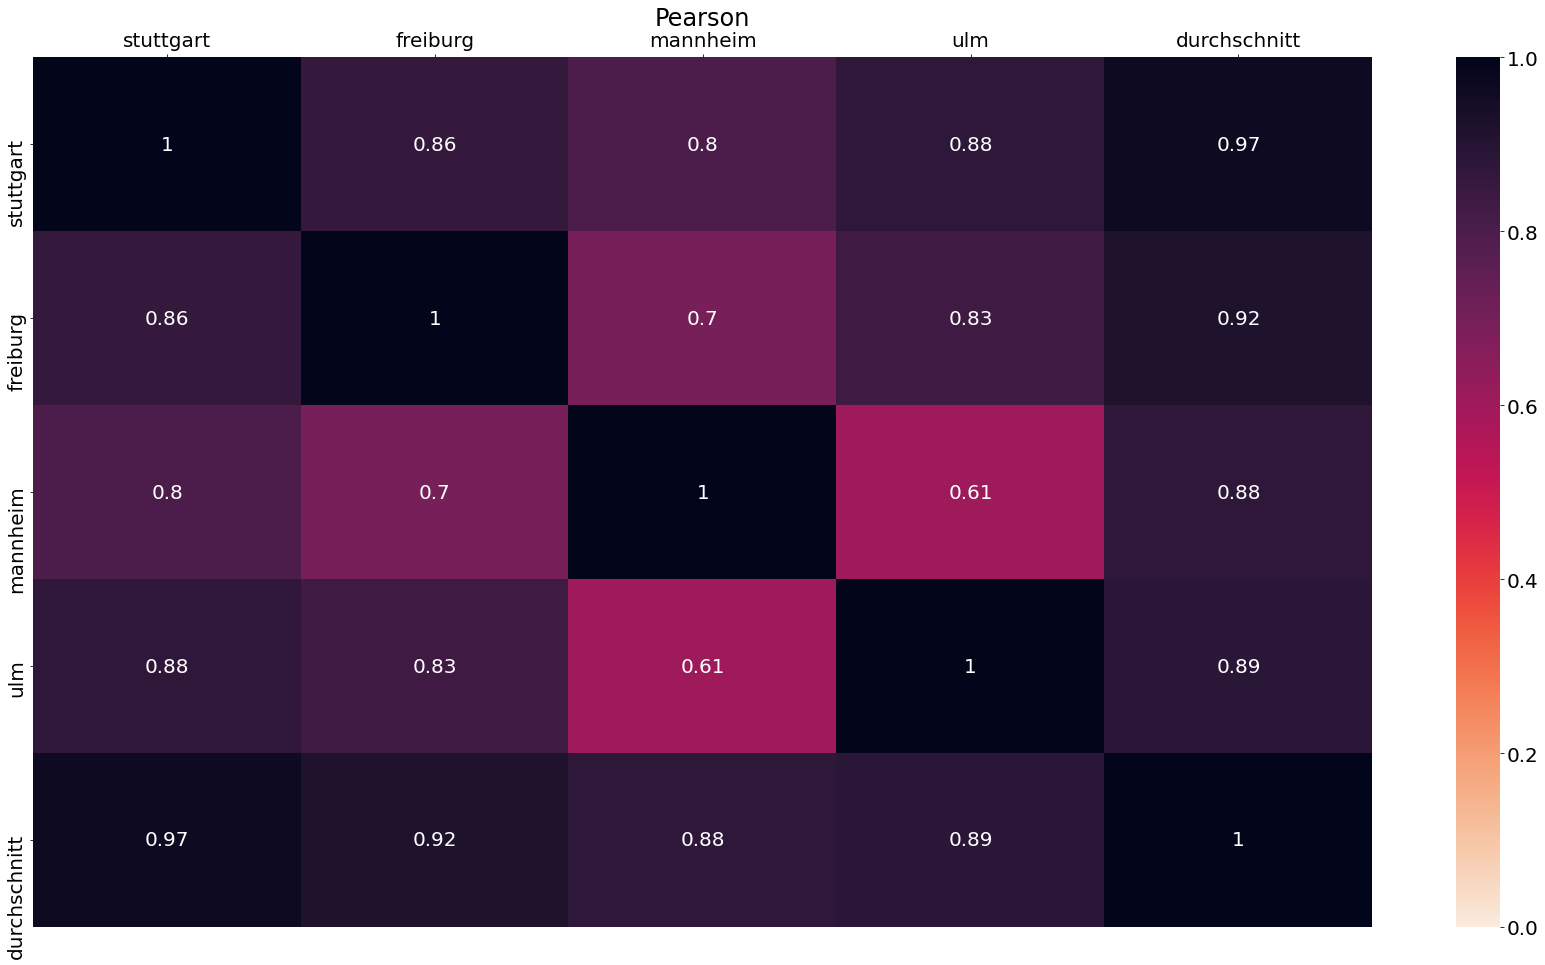

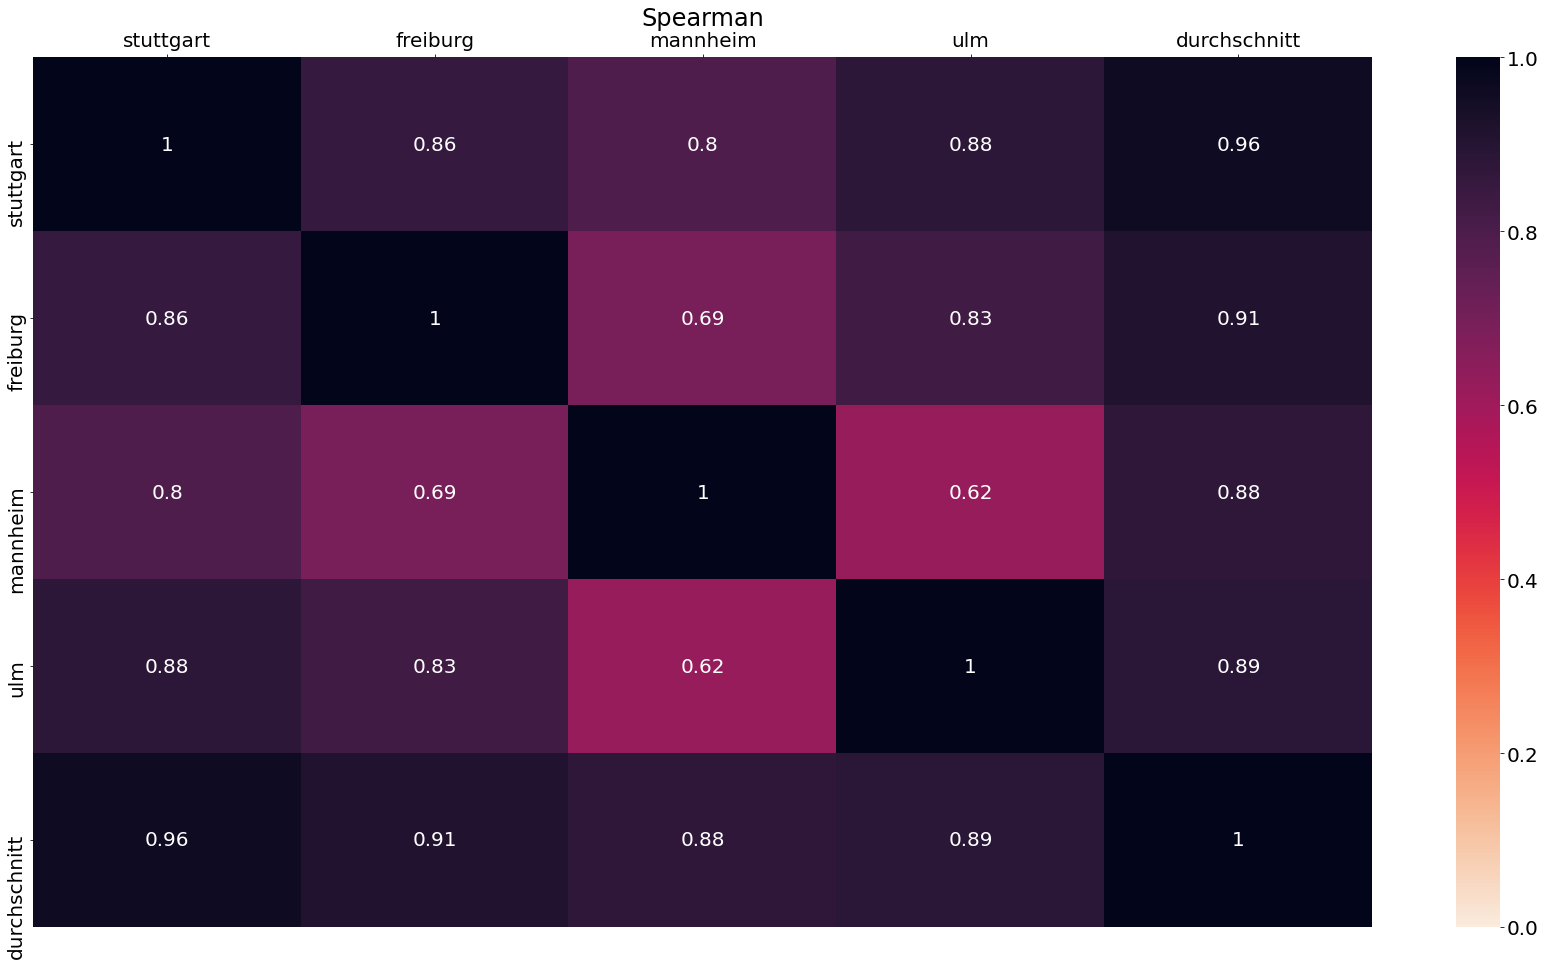

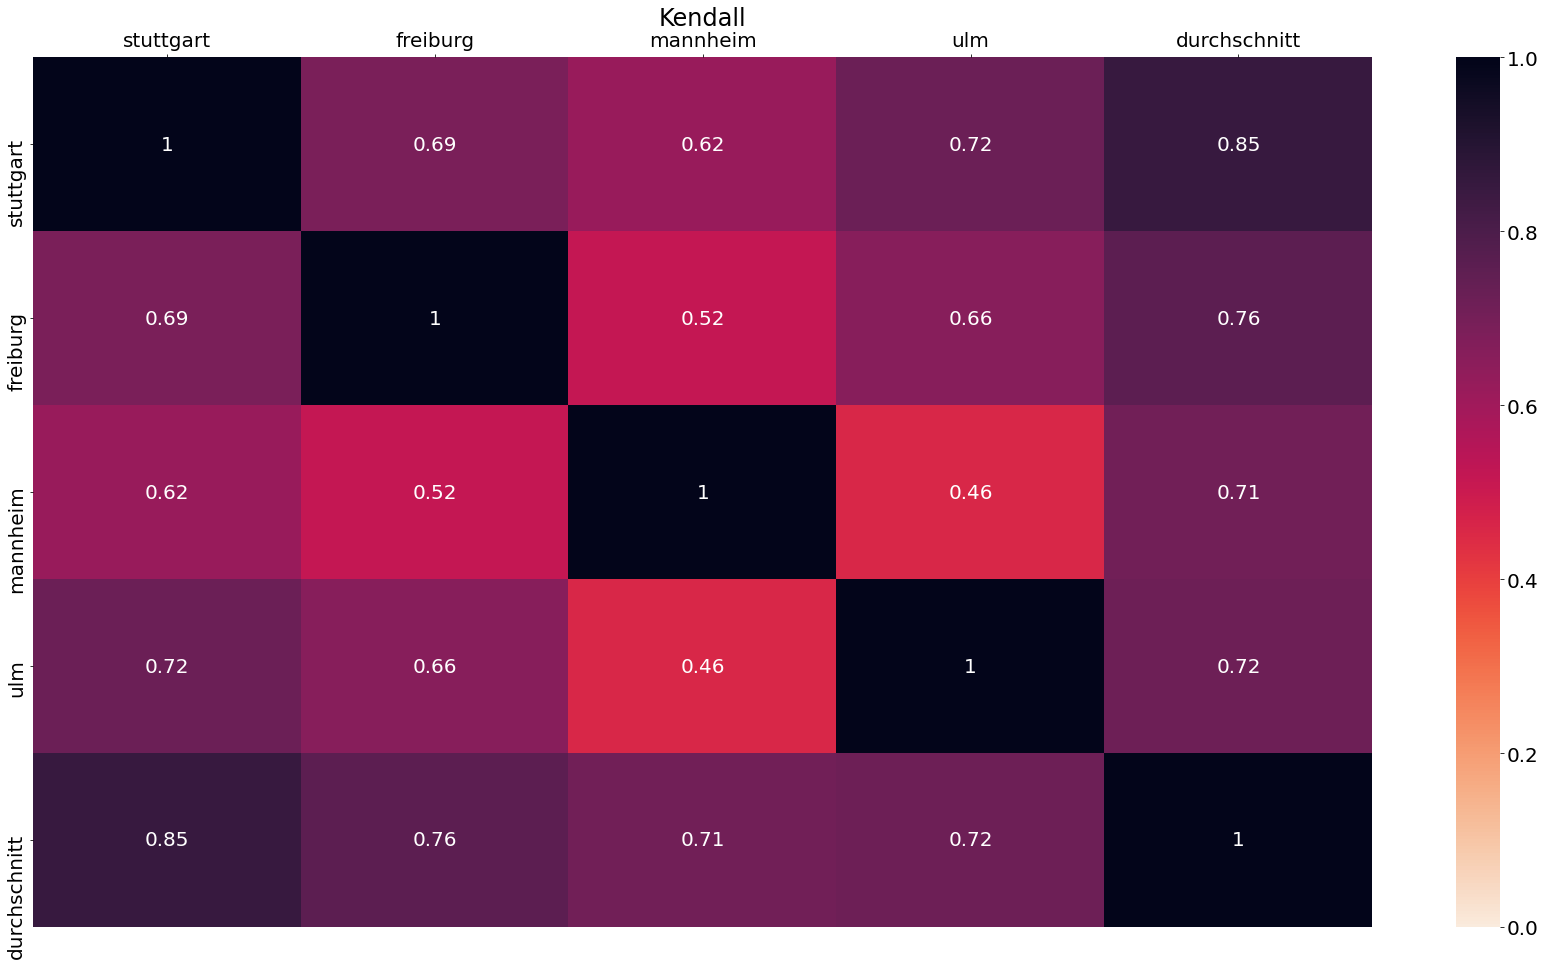

In [14]:
#Heatmap der Korrelationen untereinander (Pearson)
ax = sns.heatmap(data=df.corr(method="pearson"), annot=True, vmin=0, vmax=1, cmap="rocket_r");
ax.set_title("Pearson")
ax.xaxis.set_ticks_position("top")

plt.show()

#Heatmap der Korrelationen untereinander (Spearman)
ax = sns.heatmap(data=df.corr(method="spearman"), annot=True, vmin=0, vmax=1, cmap="rocket_r");
ax.set_title("Spearman")
ax.xaxis.set_ticks_position("top")

plt.show()

#Heatmap der Korrelationen untereinander (Kendall)
ax = sns.heatmap(data=df.corr(method="kendall"), annot=True, vmin=0, vmax=1, cmap="rocket_r");
ax.set_title("Kendall")
ax.xaxis.set_ticks_position("top")

plt.show()

# <font size="7">Fazit</font>
<font size="5">Die Werte der einzelnen Städte sind untereinander etwas schwächer korreliert, bewegen sich allerdings synchron und sind ausreichend stark mit dem Durchschnitt korreliert. Daher wird im Folgenden nun noch der Durchschnitt über alle Städte verwendet.</font>